In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={"figure.figsize": (9, 6)})

In [4]:
events_df = pd.read_csv("https://stepik.org/media/attachments/course/4852/event_data_train.zip")

In [5]:
events_df

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [6]:
events_df["date"] = pd.to_datetime(events_df.timestamp, unit='s')
events_df["day"] = events_df.date.dt.date

In [7]:
events_df

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


<Axes: xlabel='day'>

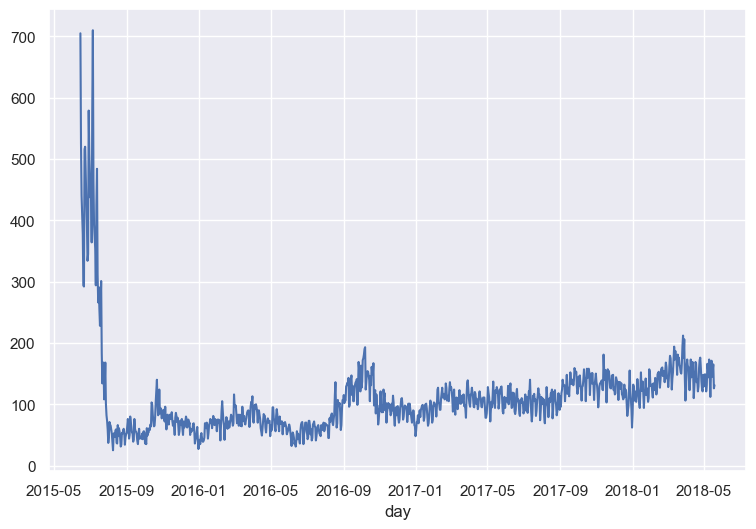

In [8]:
events_df.groupby("day").user_id.nunique().plot()

<Axes: >

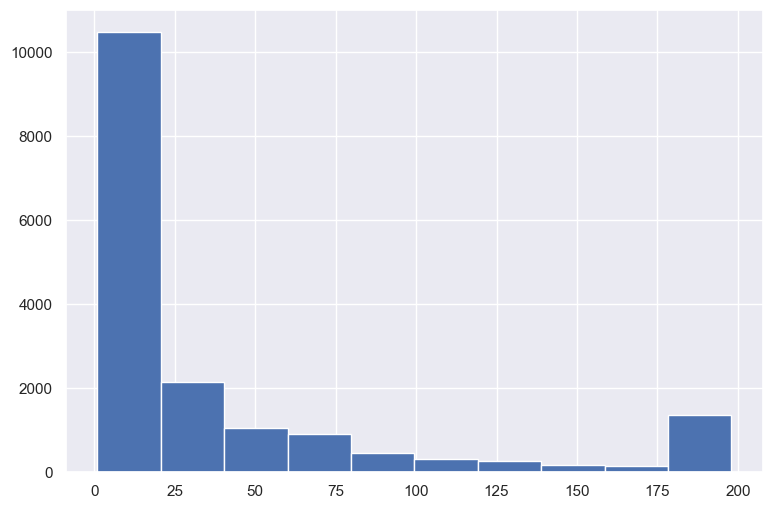

In [9]:
events_df[events_df.action == "passed"] \
    .groupby("user_id", as_index=False) \
    .agg({"step_id": "count"}) \
    .rename(columns={"step_id": "passed_steps"}).passed_steps.hist()

In [10]:
# При таком подходе мы теряем пользователей, у которых нет ни одного пройденного степа (нет "passed")
# Чтобы учесть такие кейсы, можно воспользоваться pivot_table

<Axes: >

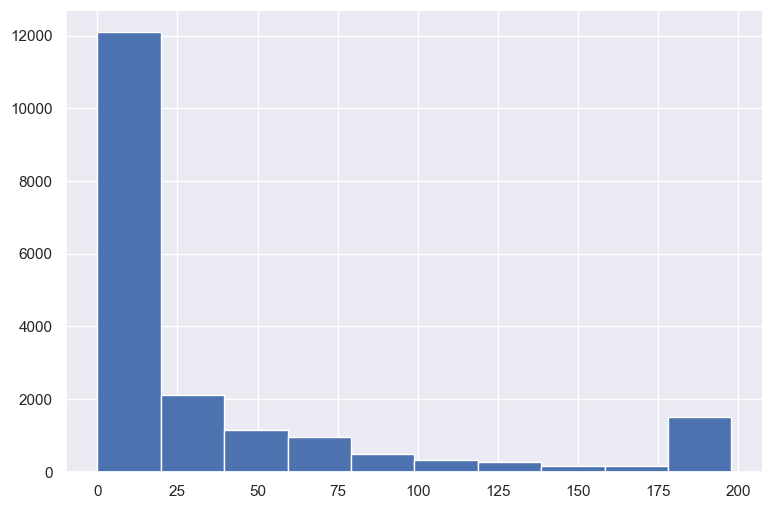

In [11]:
events_df.pivot_table(
    index="user_id",
    columns="action",
    values="step_id",
    aggfunc="count",
    fill_value=0,
).reset_index().discovered.hist()

In [12]:
submissions_df = pd.read_csv("https://stepik.org/media/attachments/course/4852/submissions_data_train.zip")

In [13]:
submissions_df

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [14]:
submissions_df["date"] = pd.to_datetime(submissions_df.timestamp, unit='s')
submissions_df["day"] = submissions_df.date.dt.date

In [15]:
submissions_df

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [16]:
users_scores = submissions_df.pivot_table(
    index="user_id",
    columns="submission_status",
    values="step_id",
    aggfunc="count",
    fill_value=0,
).reset_index()

In [17]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [18]:
gap_data = events_df[["user_id", "day", "timestamp"]].drop_duplicates(subset=["user_id", "day"]) \
    .groupby("user_id")["timestamp"].apply(list) \
    .apply(np.diff).values

In [19]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [20]:
gap_data = gap_data / (24 * 60 * 60)

<Axes: >

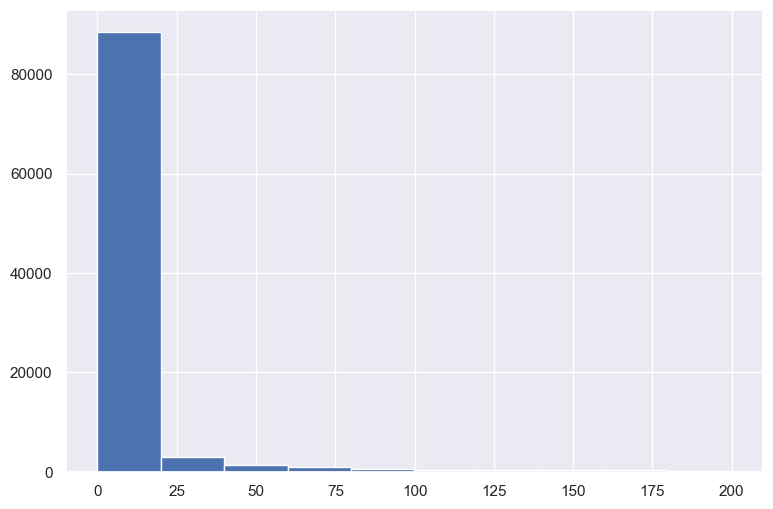

In [21]:
# Гистограмма количества дней перерыва между уроками у пользователей
gap_data[gap_data < 200].hist()

In [22]:
# Максимальное количество дней перерыва между уроками у 90% пользователей
gap_data.quantile(0.90)

18.325995370370403

In [23]:
# Максимальное количество дней перерыва между уроками у 95% пользователей
gap_data.quantile(0.95)

59.760440972222156

In [24]:
# В качестве значения, определяющего количество дней перерыва между уроками,
# после которого можно считать, что пользователь покинул курс
# выберем значение примерно промежуточное межу 90 и 95 процентилями - 30 дней
MAX_GAP_DAYS = 30
MAX_GAP = MAX_GAP_DAYS * 24 * 60 * 60
MAX_GAP

2592000

In [25]:
# Задача
# Данные, с которыми мы работаем, обезличены, тоесть реальные id пользователей заменены случайным числом.
# Определить за каким вымышленным id скрывается Анатолий Карпов - автор курса, данные которого мы анализируем?

# Замечание: так как Анатолий Карпов - автор курса, то он должен знать все правильные ответы

In [26]:
users_scores.query('correct == correct.max()')

submission_status,user_id,correct,wrong
439,1046,421,513


In [27]:
# Вернемся к уроку
# Разметим пользователей по принципу покинули ли они курс, проходят его сейчас или уже прошли его.

In [28]:
users_data = events_df.groupby("user_id", as_index=False) \
    .agg({"timestamp": "max"}) \
    .rename(columns={"timestamp": "last_visit"})

In [29]:
# Определим текущее время и будем сравнивать разницу между ним и последним посещением пользователя
# со отсекающим значением MAX_GAP
from time import time
now = int(time())
users_data["is_gone"] = (now - users_data.last_visit) > MAX_GAP

In [30]:
users_data

,user_id,last_visit,is_gone
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [31]:
# Объединим таблицу активности пользователей и таблицу результатов
users_data = users_data.merge(users_scores, on="user_id", how="outer").fillna(0)

In [32]:
users_data

,user_id,last_visit,is_gone,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [33]:
# Составим таблицу с действиями пользователей на курсе
users_events = events_df.pivot_table(
    index="user_id",
    columns="action",
    values="step_id",
    aggfunc="count",
    fill_value=0,
).reset_index()

In [34]:
users_events

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [35]:
# Объединим полученную таблицу с таблицей данных пользователей
users_data = users_data.merge(users_events, on="user_id", how="outer")

In [36]:
users_data

,user_id,last_visit,is_gone,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [37]:
# Посчитаем количество уникальных дней пользователей на курсе
users_days = events_df.groupby("user_id").day.nunique().to_frame().reset_index()

In [38]:
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [39]:
# Объединим полученную таблицу с таблицей данных пользователей
users_data = users_data.merge(users_days, on="user_id", how="outer")

In [40]:
users_data

,user_id,last_visit,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [41]:
# Убедимся, что данные и пользователи не были потеряны
# Сравним количество пользователей в полученной таблице с исходной
users_data.user_id.nunique() == events_df.user_id.nunique()

True

In [42]:
# Учтем пользователей, которые набрали достаточное количество баллов и прошли курс
PASSING_SCORE = 170
users_data["passed_course"] = users_data.passed > PASSING_SCORE

In [43]:
users_data

,user_id,last_visit,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [44]:
users_data.groupby("passed_course").count().user_id

passed_course
False    17809
True      1425
Name: user_id, dtype: int64

In [45]:
# Посчитаем процент пользователей, которые успешно прошли курс
(1425 / 17809) * 100

8.001572238755687